## TODO

* Preprocessing
* KMeans / Gaussian Mixture Clustering
* Hierarchical Clustering
* TSNE
* https://www.kaggle.com/code/ankits29/credit-card-customer-clustering-with-explanation
* https://www.kaggle.com/code/songulerdem/clustering-on-credit-card-dataset-with-pycaret
* https://machinelearningmastery.com/clustering-algorithms-with-python/
* https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [1]:
#Import Necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('data/cc_general.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### MISSING DATA

In [6]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df[df['MINIMUM_PAYMENTS'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


<AxesSubplot: >

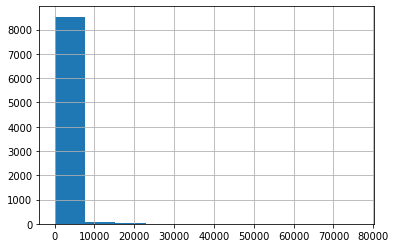

In [8]:
df['MINIMUM_PAYMENTS'].hist()

In [9]:
df['MINIMUM_PAYMENTS'].fillna(value=0, inplace=True)

In [10]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
df[df['CREDIT_LIMIT'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [12]:
df = df[df['CREDIT_LIMIT'].notna()]

In [13]:
df.shape

(8949, 18)

<AxesSubplot: >

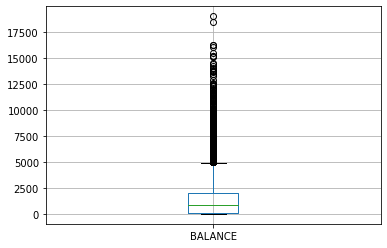

In [14]:
df[['BALANCE']].boxplot()

In [18]:
col ='BALANCE'
# calculate interquartile range
q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
iqr = q75 - q25
print(f'COLUMN: {col}\nPercentiles: 25th={q25:.2f}, 75th={q75:.2f}, IQR={iqr:.2f}')
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in df[col] if x < lower or x > upper]
print(f'Identified outliers: {len(outliers)} of {len(df[col])} values')
# remove outliers
df = df[(df[col]>=lower)&(df[col]<=upper)]

COLUMN: BALANCE
Percentiles: 25th=128.37, 75th=2054.37, IQR=1926.01
Identified outliers: 695 of 8949 values


### DISTRIBUTIONS

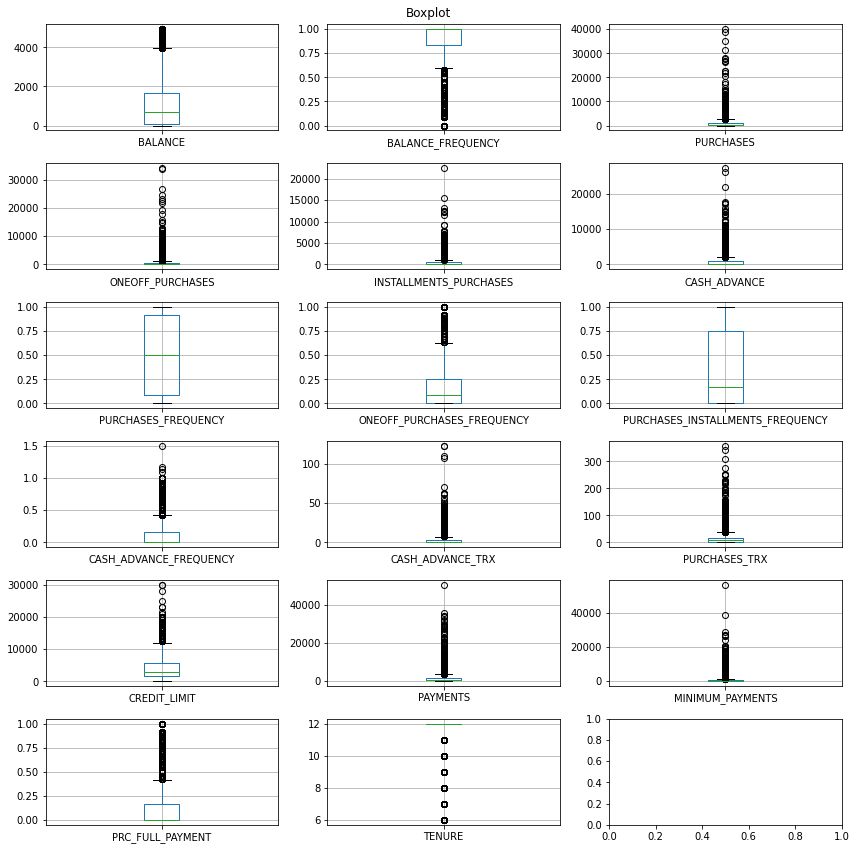

In [19]:
fig, axes = plt.subplots(6,3, figsize=(12,12))
# for i, col in enumerate(df.drop('CUST_ID', axis=1).columns):
for i, col in enumerate(df.iloc[:,1:].columns):
    df[[col]].boxplot(ax=axes[i//3,i%3])
fig.suptitle('Boxplot')
plt.tight_layout()
plt.show();

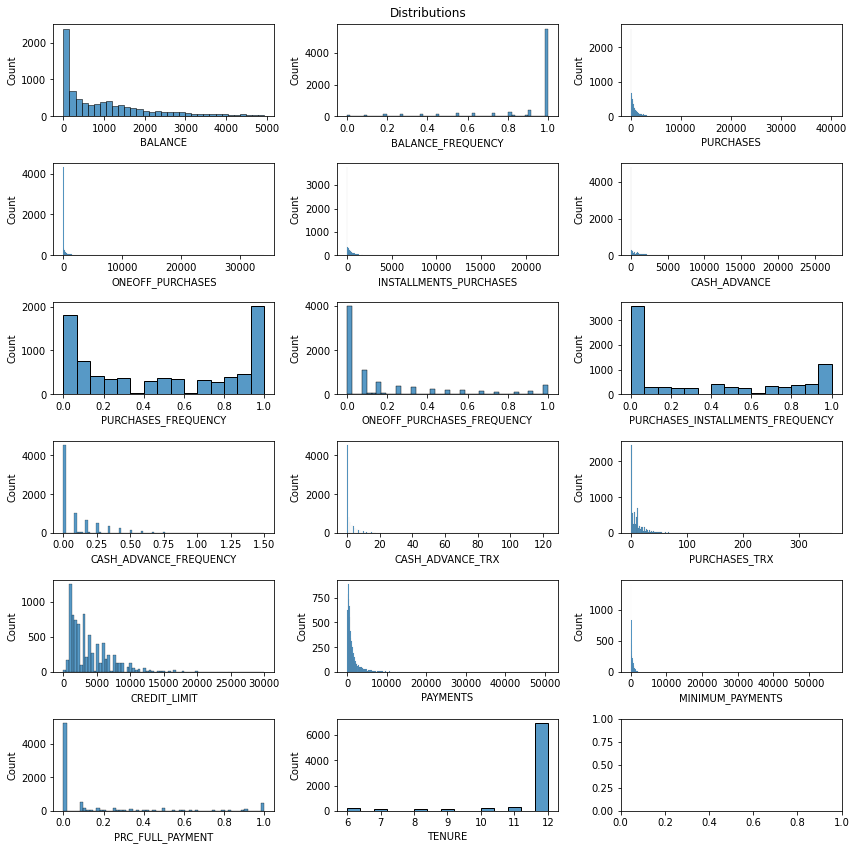

In [20]:
fig, axes = plt.subplots(6,3, figsize=(12,12))
# for i, col in enumerate(df.drop('CUST_ID', axis=1).columns):
for i, col in enumerate(df.iloc[:,1:].columns):
    sns.histplot(x=col, data=df, ax=axes[i//3,i%3])
fig.suptitle('Distributions')
plt.tight_layout()
plt.show();

### CORRELATIONS


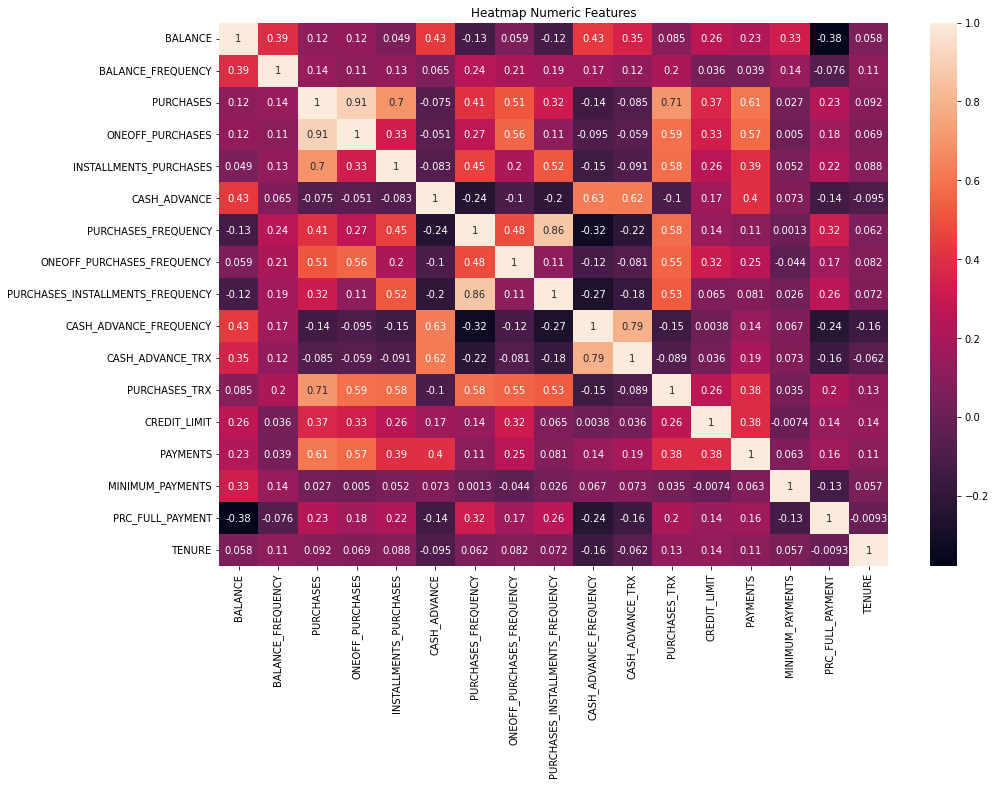

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title('Heatmap Numeric Features')
plt.xticks(rotation=90)
plt.show()

### SCALING

In [23]:
num_df = df.select_dtypes(include=np.number)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
num_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)

In [27]:
num_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.884535,-0.202448,-0.447647,-0.382399,-0.353109,-0.462807,-0.817810,-0.672380,-0.712508,-0.643461,-0.454665,-0.527888,-0.937288,-0.533733,-0.295325,-0.551198,0.368471
1,1.777153,0.170438,-0.498902,-0.382399,-0.468414,3.564179,-1.234873,-0.672380,-0.922619,0.726338,0.220634,-0.616518,0.929949,1.020904,0.271392,0.186569,0.368471
2,1.181669,0.543324,-0.083511,0.163731,-0.468414,-0.462807,1.267502,2.713417,-0.922619,-0.643461,-0.454665,-0.084738,1.085552,-0.366258,0.001010,-0.551198,0.368471
3,0.484183,-0.948220,0.306447,0.676422,-0.468414,-0.334185,-1.026343,-0.390232,-0.922619,-0.186863,-0.285840,-0.572203,1.085552,-0.614151,-0.380081,-0.551198,0.368471
4,-0.230544,0.543324,-0.490306,-0.371097,-0.468414,-0.462807,-1.026343,-0.390232,-0.922619,-0.643461,-0.454665,-0.572203,-0.875047,-0.343835,-0.231364,-0.551198,0.368471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,-0.894980,0.543324,-0.342495,-0.382399,-0.116554,-0.462807,1.267502,-0.672380,1.178502,-0.643461,-0.454665,-0.350628,-0.937288,-0.484402,-0.350381,1.108780,-4.041432
8250,-0.902819,0.543324,-0.337725,-0.382399,-0.105821,-0.462807,1.267502,-0.672380,1.178502,-0.643461,-0.454665,-0.350628,-0.937288,-0.504220,-0.380081,-0.551198,-4.041432
8251,-0.899270,-0.140302,-0.421322,-0.382399,-0.293886,-0.462807,0.850438,-0.672380,0.758279,-0.643461,-0.454665,-0.394943,-0.937288,-0.581765,-0.330009,0.278791,-4.041432
8252,-0.907639,-0.140302,-0.498902,-0.382399,-0.468414,-0.439957,-1.234873,-0.672380,-0.922619,0.269740,-0.117016,-0.616518,-1.092891,-0.593210,-0.346208,0.278791,-4.041432


## CLUSTER MODELLING

### PCA

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit_transform(num_df)

array([[-1.51391118, -1.31200253,  0.38973791, ...,  0.2715975 ,
        -0.16401488,  0.16114219],
       [-1.54492303,  3.30343095,  0.60561081, ...,  0.29303085,
        -1.00918206, -0.22228201],
       [ 1.1009381 ,  0.17697423, -0.23917616, ..., -1.06303266,
         0.09316379,  0.22462287],
       ...,
       [-0.68056903, -1.88625083, -0.33088243, ...,  0.05135995,
         0.1827331 ,  0.43633528],
       [-2.23822694, -0.84803337,  0.99112288, ...,  0.48895637,
         0.39218269,  0.18269864],
       [-0.44113777, -0.11788128,  0.9241577 , ..., -0.06315647,
         0.40865323, -0.61122071]])

In [29]:
pca.explained_variance_ratio_.cumsum()

array([0.27713429, 0.46297689, 0.55620632, 0.63475041, 0.69649196,
       0.75378815, 0.80129201, 0.84613248, 0.88460329, 0.9149687 ,
       0.93733901, 0.95741238, 0.97353625, 0.98668816, 0.99740226])

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(num_df)

In [31]:
num_df.shape

(8254, 17)

In [32]:
components.shape

(8254, 2)

C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


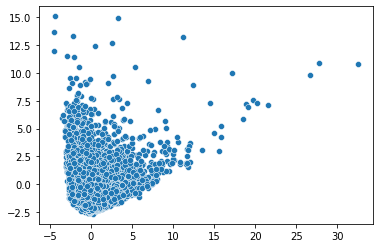

In [33]:
component1 = components[:,0]
component2 = components[:,1]
sns.scatterplot(component1, component2);

### Hierarchical Clustering

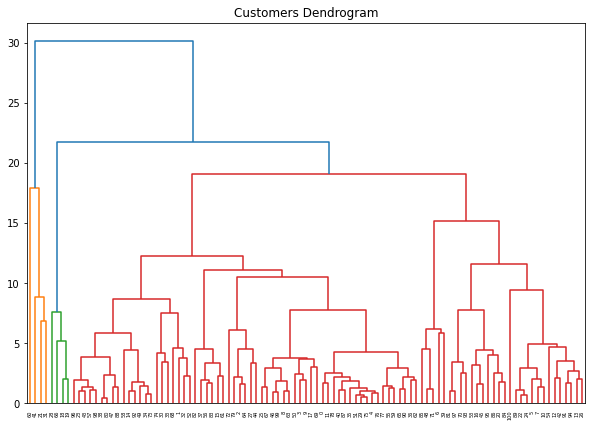

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = linkage(num_df.loc[:100, :], 
            method='ward', 
            metric="euclidean")
dendrogram(Z=clusters)
plt.show()

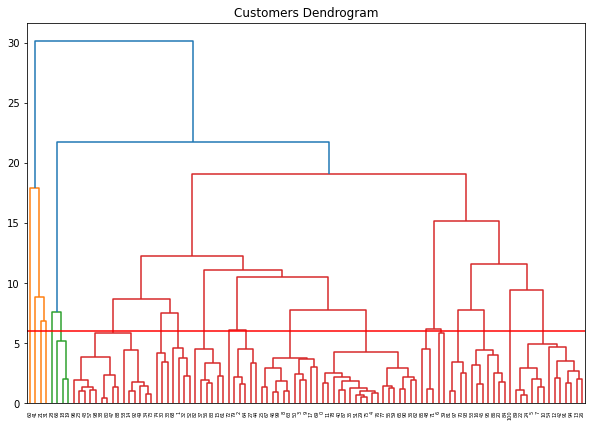

In [35]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = linkage(num_df.loc[:100, :], 
            method='ward', 
            metric="euclidean")
dendrogram(Z=clusters)
plt.axhline(y = 6, color = 'r', linestyle = '-')
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
clustering_model.fit(num_df)
clustering_model.labels_

array([8, 2, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
clustering_model.labels_.shape

(8254,)

In [38]:
pd.Series(clustering_model.labels_).value_counts().sort_values(ascending=False)

8    2102
2    1439
3    1214
6    1197
1    1110
0     769
5     200
4     133
7      76
9      14
dtype: int64

In [39]:
df['clusters'] = clustering_model.labels_

In [40]:
df.groupby('clusters').agg('median')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,444.183285,0.875,177.760,0.000,0.000,360.199098,0.333333,0.000000,0.000000,0.142857,1.0,4.0,1500.0,326.199240,149.615036,0.000000,8.0
1,650.566365,1.000,2223.940,1356.665,533.440,0.000000,1.000000,0.750000,0.666667,0.000000,0.0,31.0,6000.0,1939.583283,229.406423,0.083333,12.0
2,1980.103629,1.000,0.000,0.000,0.000,1503.182148,0.000000,0.000000,0.000000,0.272727,6.0,0.0,4000.0,1026.076088,624.012723,0.000000,12.0
3,171.766731,1.000,637.235,0.000,561.685,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,14.0,2500.0,705.304457,180.382272,0.090909,12.0
4,1272.927288,1.000,8053.950,6099.080,1434.260,0.000000,1.000000,0.916667,0.750000,0.000000,0.0,93.0,7500.0,7007.797351,352.090849,0.250000,12.0
5,2395.619161,1.000,105.595,0.000,0.000,5170.624177,0.083333,0.000000,0.000000,0.609849,23.0,1.0,6000.0,6030.695480,826.646446,0.083333,12.0
6,23.934205,0.400,195.000,0.000,80.430,0.000000,0.250000,0.000000,0.166667,0.000000,0.0,4.0,3000.0,411.825987,106.285000,0.000000,12.0
7,1808.840955,1.000,162.080,0.000,100.500,19.011419,0.333333,0.000000,0.250000,0.083333,1.0,6.0,1850.0,297.413349,11778.098735,0.000000,12.0
8,917.246633,1.000,262.165,93.655,0.000,0.000000,0.250000,0.083333,0.000000,0.000000,0.0,4.0,2100.0,573.573373,302.280846,0.000000,12.0


Cluster 7 has clients with highest limit, and credit card usage, and use installments frequently

### KMEANS

Use Kmeans Clustering methods to find segments

In [41]:
from sklearn.cluster import KMeans

In [42]:
from sklearn.metrics import silhouette_score
k_range = list(range(2,11))
silhouette_coefficients = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(num_df)
    score = silhouette_score(num_df, km.labels_)
    silhouette_coefficients.append(score)

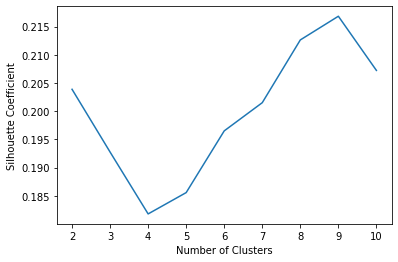

In [43]:
plt.plot(k_range, silhouette_coefficients)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [44]:
km = KMeans(n_clusters=3)

In [45]:
km.fit(num_df)

KMeans(n_clusters=3)

In [46]:
df['clusters'] = km.labels_

In [47]:
df.groupby('clusters').agg('median')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,902.099225,1.0,2984.34,1741.3,1001.85,0.000000,1.000000,0.75,0.900000,0.000000,0.0,42.0,6500.0,2803.353036,279.508067,0.083333,12.0
1,194.493602,1.0,385.00,0.0,147.70,0.000000,0.545455,0.00,0.333333,0.000000,0.0,8.0,2500.0,542.489358,177.476329,0.000000,12.0
2,1853.652789,1.0,0.00,0.0,0.00,1612.463966,0.000000,0.00,0.000000,0.272727,6.0,0.0,3000.0,908.151415,604.085748,0.000000,12.0


In [48]:
df['clusters'].value_counts()

1    4933
2    2226
0    1095
Name: clusters, dtype: int64

### DBSCAN

In [49]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.25, min_samples=9)

In [50]:
dbscan_model.fit(num_df)

DBSCAN(eps=0.25, min_samples=9)

In [51]:
dbscan_res = dbscan_model.fit_predict(num_df)

In [52]:
len(dbscan_res)

8254

In [53]:
dbscan_clstrs = np.unique(dbscan_res)
dbscan_clstrs

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [54]:
df['clusters'] = dbscan_res
df.groupby('clusters').agg('median')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
-1,674.838072,1.000000,387.120,45.650,104.00,0.000000,0.500000,0.083333,0.25,0.000000,0.0,8.0,3000.0,792.623374,243.991341,0.0,12.0
0,68.496499,1.000000,227.640,0.000,227.64,0.000000,1.000000,0.000000,1.00,0.000000,0.0,12.0,1000.0,205.498282,168.331121,0.0,12.0
1,1294.324002,1.000000,0.000,0.000,0.00,99.264367,0.000000,0.000000,0.00,0.083333,1.0,0.0,1500.0,343.313124,408.666535,0.0,12.0
2,1293.746191,1.000000,0.000,0.000,0.00,137.411210,0.000000,0.000000,0.00,0.166667,2.0,0.0,1500.0,379.489253,380.779414,0.0,12.0
3,4.887700,0.181818,64.650,64.650,0.00,0.000000,0.083333,0.083333,0.00,0.000000,0.0,1.0,1500.0,126.114099,29.937003,0.0,12.0
4,1306.436456,1.000000,0.000,0.000,0.00,115.766104,0.000000,0.000000,0.00,0.250000,3.0,0.0,1500.0,349.408692,427.330636,0.0,12.0
5,1081.310866,1.000000,49.625,49.625,0.00,0.000000,0.083333,0.083333,0.00,0.000000,0.0,1.0,1200.0,320.950961,420.880620,0.0,12.0
6,1076.571029,1.000000,55.690,55.690,0.00,48.730842,0.083333,0.083333,0.00,0.083333,1.0,1.0,1200.0,335.809644,456.016895,0.0,12.0
7,2693.335001,1.000000,0.000,0.000,0.00,210.191590,0.000000,0.000000,0.00,0.083333,1.0,0.0,3000.0,695.508926,853.202057,0.0,12.0


### Silhouette Score DBSCAN 

In [55]:
silhouette_score(num_df, dbscan_res)

-0.3930366246688578

### Silhouette Score KMeans 

In [56]:
silhouette_score(num_df, km.labels_)

0.19194100633207029

### Silhouette Score Hierarchical Clustering

In [57]:
silhouette_score(num_df, clustering_model.labels_)

0.12993209776518932

## Gaussian Mixture 

In [54]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4)

In [56]:
gm.fit(num_df)

GaussianMixture(n_components=4)

In [57]:
labels = gm.predict(num_df)

In [58]:
df['clusters'] = labels
df.groupby('clusters').agg('median')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,1381.514061,1.0,0.000,0.000,0.000,1103.566466,0.000000,0.000000,0.000000,0.166667,3.0,0.0,3000.0,712.739894,440.996796,0.0,12.0
1,161.977225,1.0,582.895,149.985,256.455,0.000000,0.750000,0.083333,0.500000,0.000000,0.0,12.0,3000.0,669.314320,175.114213,0.0,12.0
2,2377.742667,1.0,3030.330,1300.480,975.790,258.954597,1.000000,0.416667,0.833333,0.083333,1.0,41.0,6500.0,3632.719723,1366.869273,0.0,12.0
3,1684.705035,1.0,522.130,229.000,141.580,1057.519449,0.571429,0.166667,0.333333,0.250000,4.0,9.0,3500.0,1186.855827,717.913829,0.0,12.0


In [59]:
silhouette_score(num_df, labels)

0.07988489300252986

In [60]:
df['clusters'].value_counts()

1    4132
0    2252
3    1846
2     719
Name: clusters, dtype: int64

In [63]:
silhouette_coefficients = []
k_range = list(range(2,11))
for k in k_range:
    gm = GaussianMixture(n_components=k)
    gm.fit(num_df)
    score = silhouette_score(num_df, gm.predict(num_df))
    silhouette_coefficients.append(score)

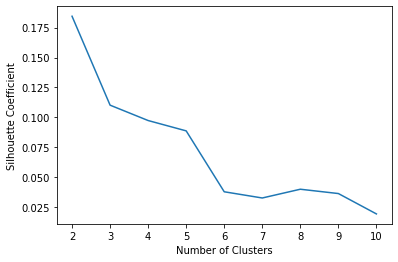

In [64]:
plt.plot(k_range, silhouette_coefficients)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()